In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import re
from matplotlib.pyplot import figure, show, axes, sci
from matplotlib import cm, colors
from matplotlib.font_manager import FontProperties
from numpy import amin, amax, ravel
import numpy.ma as ma

A_set = set()
B1_set = set()
B2_set = set()
X_set = set()
value_eg = {}

import re
#filename = '/Users/yao/Google Drive/data/2116/data/tolerance_octahedron_wo_transition_metal'
#filename = '/Users/yao/Google Drive/data/2116/data/Eg_result'
filename = '/Users/yao/Google Drive/data/2116/data/Hull_result'
with open(filename,'r') as f:
    for line in f:
        compound = line.split()[0]
        eg = line.split()[1]  ##change here for 1->tolerance or 2->octahedron
        value_eg[compound] = eg
        A_set.add(re.split('1|2|6', compound)[0])
        B1_set.add(re.split('1|2|6', compound)[1])
        B2_set.add(re.split('1|2|6', compound)[2])
        X_set.add(re.split('1|2|6', compound)[3])  
print(A_set)
print(B1_set)
print(B2_set)
print(X_set)

A_list = ['Li','Na','K','Rb','Cs']
B1_list = ['Li','Na','K','Rb','Cs', 'Cu','Ag','Au','Hg','In','Tl']
#B2_list = ['Sc', 'Y', 'Ti','V','Nb','Ta','Cr','Mo','Mn','Fe','Ru','Co','Rh','Ir',\
#           'Ni','Pd','Au','Al','Ga','In','Tl','As','Sb','Bi']
B2_list = ['Sc', 'Y', 'Al','Ga','In','Tl','As','Sb','Bi'] ##not including transition metals
X_list = ['F','Cl','Br','I']

if set(A_list)==A_set and set(B1_list)==B1_set and set(B2_list)==B2_set and set(X_list)==X_set:
    print('True')


{'Cs', 'K', 'Na', 'Rb', 'Li'}
{'Cs', 'Hg', 'Cu', 'Na', 'Au', 'Li', 'In', 'Ag', 'Rb', 'K', 'Tl'}
{'Ga', 'Rh', 'Pd', 'Ti', 'Mo', 'Ru', 'Au', 'In', 'Al', 'Tl', 'Fe', 'Mn', 'Ta', 'Sb', 'Ni', 'Co', 'As', 'Ir', 'V', 'Y', 'Bi', 'Cr', 'Sc', 'Nb'}
{'F', 'Br', 'Cl', 'I'}


In [52]:
import numpy as np
size_left = len(A_list)
size_right = len(B1_list)
size_bottom = len(B2_list)
eg = np.zeros( (4, size_right, size_left, size_bottom) )
number = 0
for a in range(size_left):
    for b in range(size_bottom):
        for c in range(size_right):
            for d in range(4):
                compound = A_list[a]+'2'+B1_list[c]+'1'+B2_list[b]+'1'+X_list[d]+'6'
                if compound in value_eg:
                    eg[d][c][a][b] = value_eg[compound]
                    number +=1
                else:
                    eg[d][c][a][b] = 1000
import numpy.ma as ma
masked_eg = ma.masked_where(eg>0.2, eg)  ########
masked_eg = ma.masked_where(masked_eg<-1, masked_eg) ###########

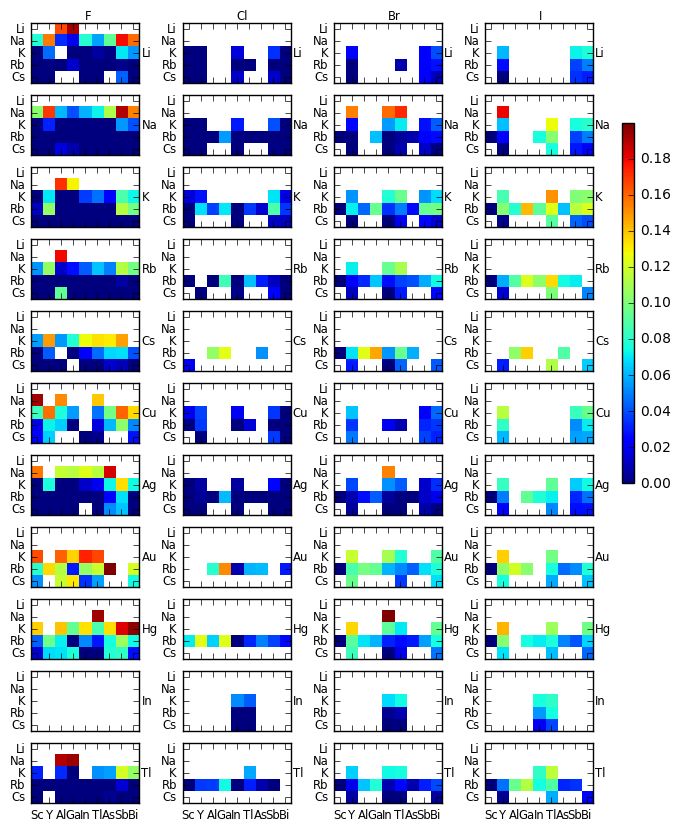

In [54]:
fig = figure(figsize=(6,4))
#cmap = cm.cool
w = 0.21
h = 0.15
ax = []
images = []
vmin = 1e40
vmax = -1e40
cax = fig.add_axes([1, 1, 0.02, 0.9])

for j in range(4):
    for i in range(size_right):
        pos = [0+j*1.2*w , 2 - i*1.2*h, w, h]
        a = fig.add_axes(pos)
        plt.xticks(np.arange(size_bottom),[])
        plt.yticks(np.arange(size_left), [])
        if i == size_right-1: 
            plt.xticks(np.arange(size_bottom), B2_list, size='small')

        plt.yticks(np.arange(size_left), A_list, size='small')
            
            
        dd = ravel(masked_eg[j][i])
        # Manually find the min and max of all colors for
        # use in setting the color scale.
        vmin = min(vmin, amin(dd))
        vmax = max(vmax, amax(dd))
        images.append(a.imshow(masked_eg[j][i],interpolation = 'nearest',aspect=1))

        ax.append(a)
    
# Set the first image as the master, with all the others
# observing it for changes in cmap or norm.

class ImageFollower:
    'update image in response to changes in clim or cmap on another image'
    def __init__(self, follower):
        self.follower = follower
    def __call__(self, leader):
        self.follower.set_cmap(leader.get_cmap())
        self.follower.set_clim(leader.get_clim())
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for i, im in enumerate(images):
    im.set_norm(norm)
    if i > 0:
        images[0].callbacksSM.connect('changed', ImageFollower(im))
fig.colorbar(images[0], cax)
axes(ax[0])     # Return the current axes to the first one,
sci(images[0])  # because the current image must be in current axes.

#rect = fig.patch
#rect.set_facecolor('white')

for i in range(size_right*4):
    ax[i].text(1.02, 0.45, B1_list[i%size_right],size='small',transform=ax[i].transAxes)
for i in range(4):
    ax[i*size_right].text(0.5, 1.06, X_list[i], size='small',transform=ax[i*size_right].transAxes)


#ax[0].text(1.2, 1.1, "eV",size=10,transform=ax[0].transAxes)
#ax[0].text(-0.16, 1.1, "a", size=13,transform=ax[0].transAxes)
#plt.savefig('/Users/yao/Google Drive/data/2116/2116 figure/full_data/Hull.pdf', dpi=300, bbox_inches="tight")
plt.show()